RMSE: 1.31, R² Score: -0.32


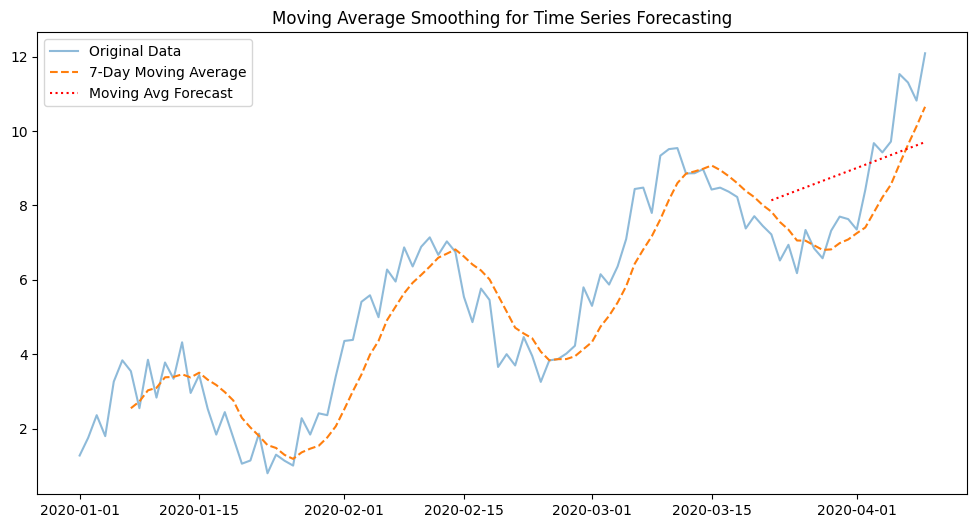

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic time series data
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
trend = np.linspace(1, 10, 100)  # Linear trend
seasonality = 2 * np.sin(np.linspace(0, 20, 100))  # Seasonal pattern
noise = np.random.normal(0, 0.5, 100)  # Random noise
ts_data = trend + seasonality + noise

ts_df = pd.DataFrame({'Date': dates, 'Value': ts_data})
ts_df.set_index('Date', inplace=True)

# Apply Moving Average Smoothing
window_size = 7
ts_df['Moving_Avg'] = ts_df['Value'].rolling(window=window_size).mean()

# Convert date to numerical format
ts_df['Days'] = (ts_df.index - ts_df.index[0]).days

# Train-test split
X = ts_df[['Days']]
y = ts_df['Moving_Avg'].dropna()
X = X.iloc[len(X) - len(y):]  # Align X with available y values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}, R² Score: {r2:.2f}')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(ts_df.index, ts_df['Value'], label='Original Data', alpha=0.5)
plt.plot(ts_df.index, ts_df['Moving_Avg'], label=f'{window_size}-Day Moving Average', linestyle='dashed')
plt.plot(X_test.index, y_pred, label='Moving Avg Forecast', linestyle='dotted', color='red')
plt.legend()
plt.title('Moving Average Smoothing for Time Series Forecasting')
plt.show()
